### What are the most in demand skills for the top 3 most popular data roles?

##### Methodology
1. Clean-up Skill Column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

In [2]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
# Filtering down to only the US
df_US = df[df['job_country'] == 'United States'].copy()

# Exploding the job skills column to get skill counts
df_skills = df_US.explode('job_skills')

In [ ]:
# Creating new dataset grouping on job_skills and then job_title_short
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Viewing to see what we have so far. We are going to convert this to a DataFrame
df_skills_count

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [ ]:
# Resetting the index and naming the skill_count column
df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,38
1,airflow,Cloud Engineer,27
2,airflow,Data Analyst,387
3,airflow,Data Engineer,4716
4,airflow,Data Scientist,1166
...,...,...,...
1865,zoom,Machine Learning Engineer,5
1866,zoom,Senior Data Analyst,50
1867,zoom,Senior Data Engineer,30
1868,zoom,Senior Data Scientist,25


In [16]:
# Sorting skill count from highest to lowest
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [19]:
# Now we are getting the top 3 roles. First get the unique values and convert to list
job_titles = df_skills_count['job_title_short'].unique().tolist()

# Creating the list of the top 3 then sorting alphabetically
job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

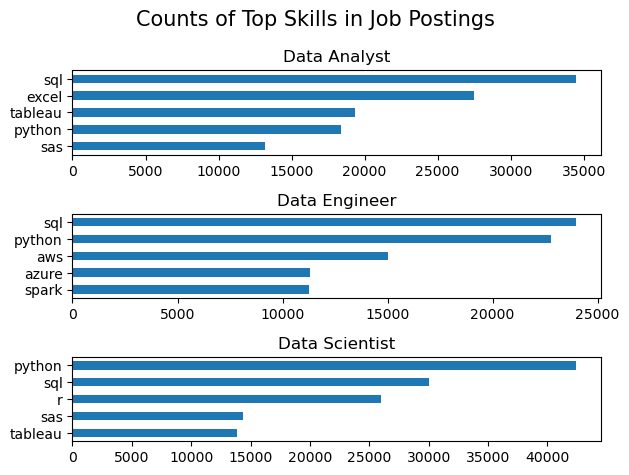

In [ ]:
fig, ax = plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
   df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
   df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
   ax[i].invert_yaxis()
   ax[i].set_ylabel('')
   ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()
plt.tight_layout

# Visualization to show counts. We want to build on this and show the
# Percentage of Likelihood the skill is going to show up in a job posting

In [31]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [35]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] = round((df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100 , 2)

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.04
1,sql,Data Analyst,34452,67816,50.80
2,sql,Data Scientist,30034,58830,51.05
3,excel,Data Analyst,27519,67816,40.58
4,r,Data Scientist,26022,58830,44.23
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.01
1866,arch,Business Analyst,1,7382,0.01
1867,asana,Machine Learning Engineer,1,921,0.11
1868,no-sql,Machine Learning Engineer,1,921,0.11


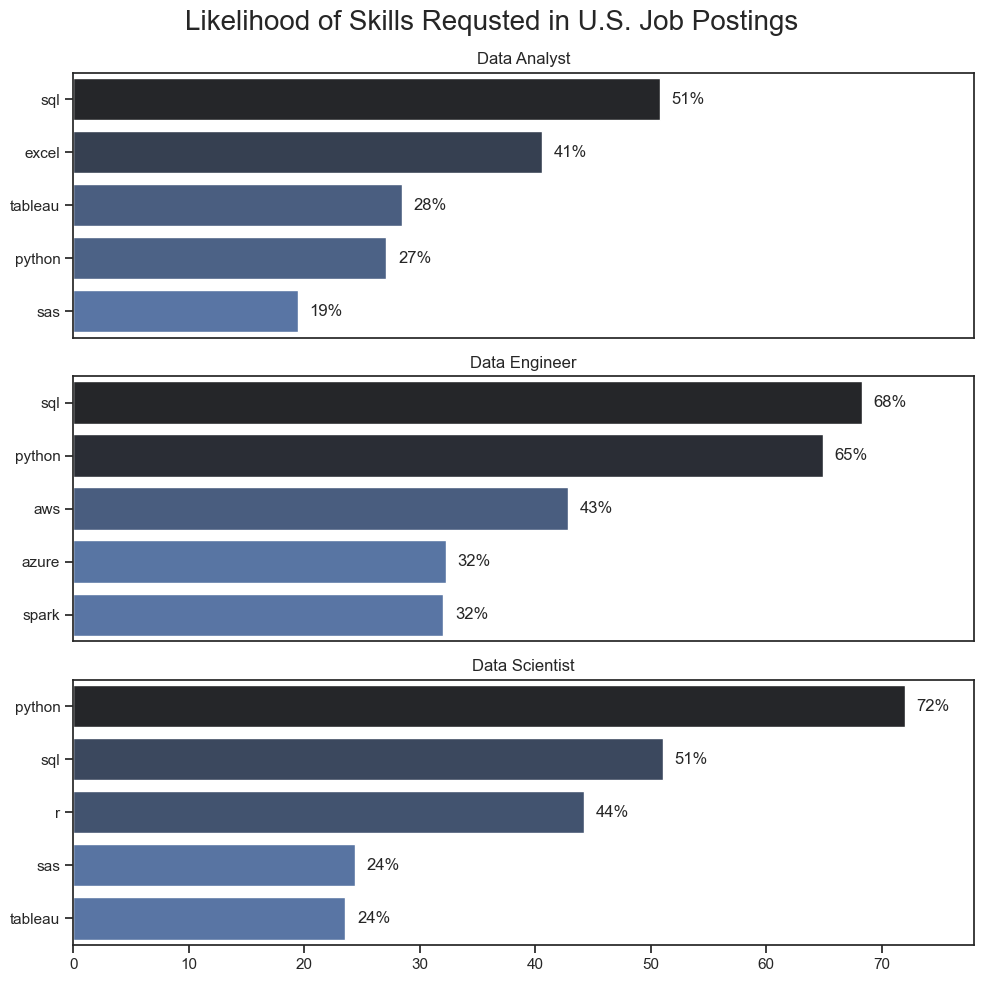

In [58]:
fig, ax = plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks', rc={'figure.figsize':(10,10)})

for i, job_title in enumerate(job_titles):
   df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
   sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r', )
   ax[i].set_title(job_title)
   ax[i].set_ylabel('')
   ax[i].set_xlabel('')
   ax[i].get_legend().remove()
   ax[i].set_xlim(0,78)

   for n, v in enumerate(df_plot['skill_percent']):
      ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

   if i != len(job_titles) - 1:
      ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requsted in U.S. Job Postings', fontsize=20)
fig.tight_layout()
plt.show()
